In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [28]:
attr_df = pd.read_csv('data-cleaned-v1/attributes.csv', index_col=0)
basic_df = pd.read_csv("data-cleaned-v1/basic.csv", index_col=0)

In [29]:
year = attr_df[["zpid", "yearBuilt"]]
price = basic_df[["zpid", "price"]]
year_price_df = pd.merge (year, price)
year_price_df = year_price_df.drop(columns=['zpid'])
year_price_df['price'] = year_price_df['price'].map(lambda price: float(price.replace(',', '')))
year_price_mean_df = year_price_df.groupby('yearBuilt').mean('price').sort_values(by=['yearBuilt']).reset_index()
year_price_mean_df

,yearBuilt,price
0,1750,495000.000000
1,1767,399999.000000
2,1780,425000.000000
3,1795,349555.000000
4,1803,375000.000000
...,...,...
141,2021,359877.777778
142,2022,603953.100000
143,2023,464230.000000
144,2024,237900.000000


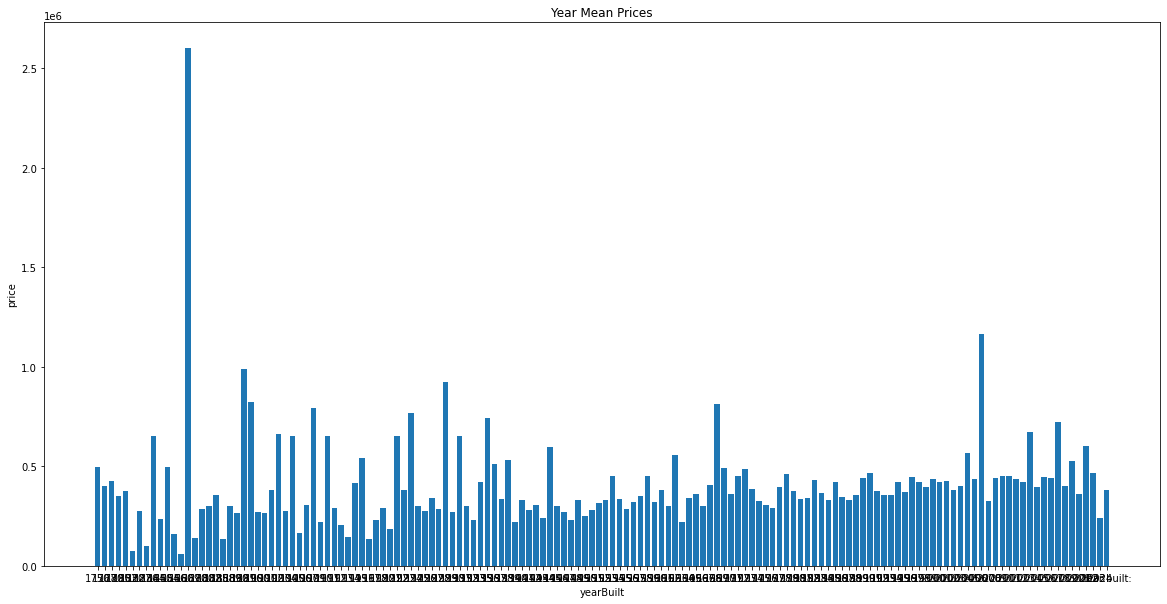

In [30]:
f = plt.figure()
f.set_figheight(10)
f.set_figwidth(20)
plt.bar(year_price_mean_df['yearBuilt'], year_price_mean_df['price'])
plt.xlabel("yearBuilt")
plt.ylabel("price")  
plt.title("Year Mean Prices")
plt.show()

In [31]:
lot = attr_df[["zpid", "lot"]]
price = basic_df[["zpid", "price"]]
lot_price_df = pd.merge (lot, price)
lot_price_df = lot_price_df.drop(columns=['zpid'])
lot_price_df

,lot,price
0,6259,"399,000"
1,7998,"345,000"
2,60984,"535,000"
3,10454,"499,983"
4,9444,"470,000"
...,...,...
1746,6861,"180,000"
1747,68389,"249,900"
1748,55007,"260,000"
1749,3049200,"149,000"


In [38]:
from scipy.stats import pearsonr
pearsonr(lot_price_df['lot'], lot_price_df['price'])[0]

(0.053648762504074375, 0.024771757777460712)

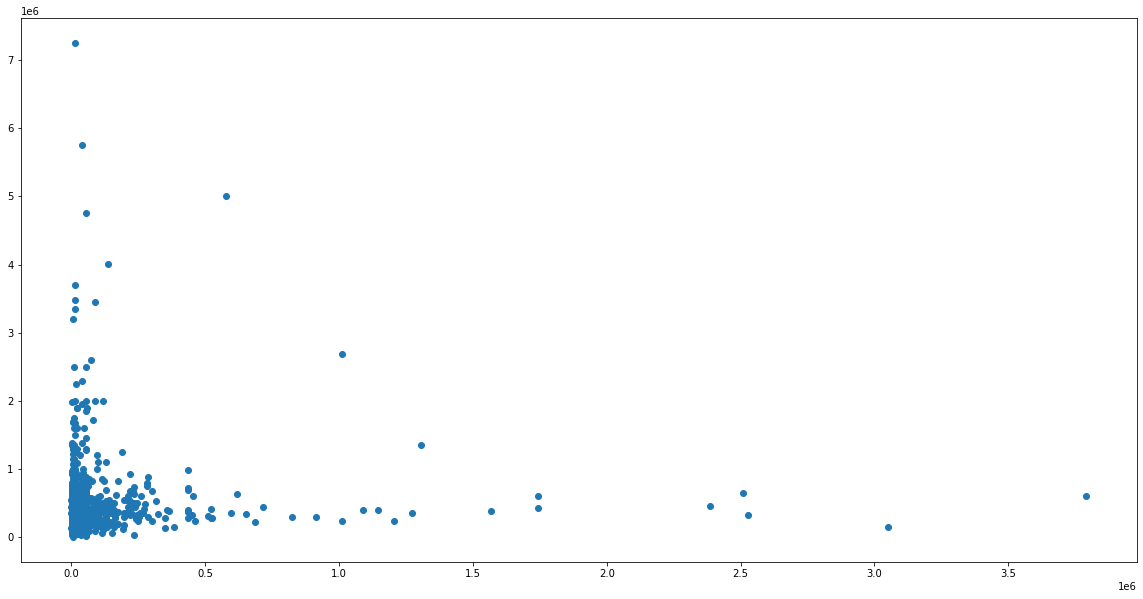

In [32]:
lot_price_df['price'] = lot_price_df['price'].map(lambda price: float(price.replace(',', '')))
f = plt.figure()
f.set_figheight(10)
f.set_figwidth(20)
plt.scatter(x=lot_price_df['lot'], y=lot_price_df['price'])
plt.show()

Text(0.5, 1.0, 'KMeans')

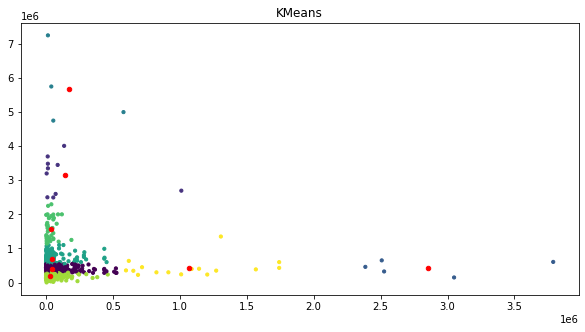

In [ ]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=8, random_state=0).fit(lot_price_df)
fig, ax = plt.subplots(1, figsize=(10, 5))
ax.scatter(lot_price_df.iloc[:, 0], lot_price_df.iloc[:, 1], s=10, c=km.labels_)
ax.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=20, c="r")
ax.set_title("KMeans")

In [35]:
basic = basic_df[["sqft", "price"]]
basic['price'] = basic['price'].map(lambda price: float(price.replace(',', '')))
basic['sqft'] = basic['sqft'].map(lambda sqft: float(sqft.__str__().replace(',', '')) if sqft.__str__() != '--' else None )
basic = basic.dropna(subset=['sqft'])
basic = basic[basic['price'] <= 1000000]
basic

/tmp/ipykernel_25113/981285135.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  basic['price'] = basic['price'].map(lambda price: float(price.replace(',', '')))
/tmp/ipykernel_25113/981285135.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  basic['sqft'] = basic['sqft'].map(lambda sqft: float(sqft.__str__().replace(',', '')) if sqft.__str__() != '--' else None )


,sqft,price
0,1500.0,399000.0
1,1310.0,345000.0
2,1152.0,535000.0
3,2840.0,499983.0
4,2192.0,470000.0
...,...,...
1746,1190.0,180000.0
1747,4629.0,249900.0
1748,1873.0,260000.0
1749,1600.0,149000.0


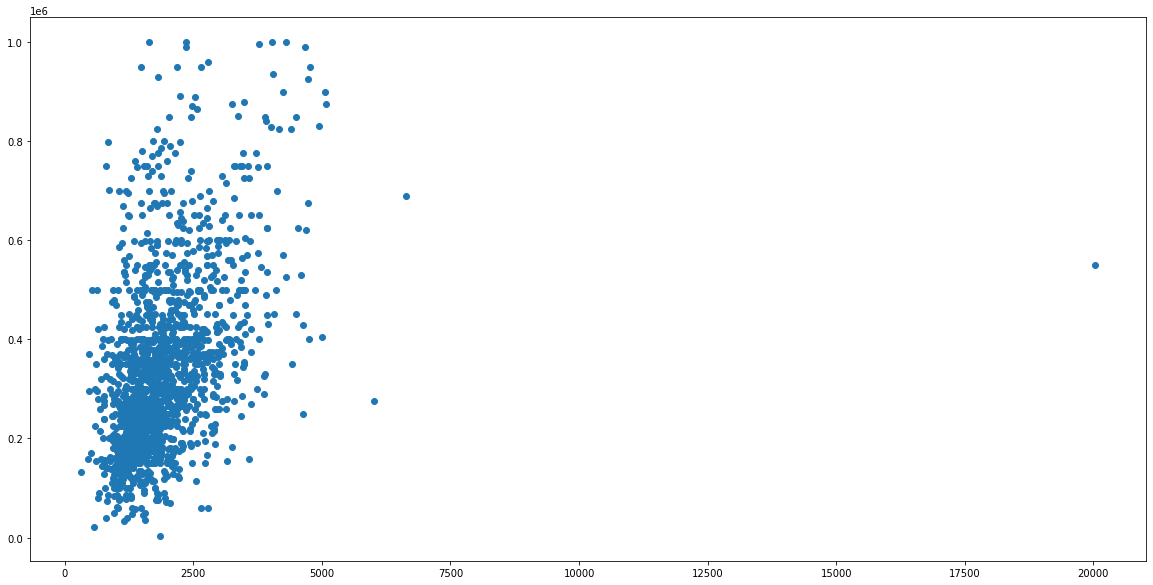

In [36]:
f = plt.figure()
f.set_figheight(10)
f.set_figwidth(20)
plt.scatter(x=basic['sqft'], y=basic['price'])
plt.show()

In [37]:

pearsonr(basic['sqft'], basic['price'])[0]

(0.42752007974072664, 1.5122208227711747e-69)